                PROYECTO INDIVIDUAL SOYHENRY- DATASCIENCE
-USANDO BASE DE DATOS DE STEAM 
-ETL- EDA

In [1]:
#LIBRERIAS
import pandas as pd
import ast

lectura y transformación de datos

In [50]:
reviews = []
#Utilizamos ast.literal_eval para convertir cada línea en un diccionario y lo agregamos a la lista rows.
with open("BASE DE DATOS STEAM/australian_user_reviews.json", encoding='MacRoman') as f:
    for line in f.readlines():
        reviews.append(ast.literal_eval(line))

#Creamos un DataFrame llamado df_reviews a partir de la lista rows. Este DataFrame contiene los datos anidados del archivo JSON.
df_reviews = pd.DataFrame(reviews)

In [51]:
df_reviews

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."
...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la..."
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l..."
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',..."
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l..."


Análisis de sentimiento usando libreria Textblob

In [4]:
from textblob import TextBlob

In [52]:
#Definimos la función para determinar si la review de los usuarios es negativa, neutral y positiva,
#y luego colocamos en una nueva columna 'sentiment_analysis' 0,1,2 respectivamente

def sentiment_analysis(review):
    if isinstance(review, list) and len(review) > 0:
        text = review[0].get('review', '')  # Obtener el texto de la reseña
        sentiment = TextBlob(text).sentiment.polarity

        if sentiment < -0.2:
            return 0  # Malo
        elif sentiment >= -0.2 and sentiment <= 0.2:
            return 1  # Neutral
        else:
            return 2  # Positivo
    else:
        return 1  # Valor predeterminado para reseñas faltantes

In [53]:
# Aplicar la función a la columna 'reviews' y crear la nueva columna 'sentiment_analysis'
df_reviews['sentiment_analysis'] = df_reviews['reviews'].apply(sentiment_analysis)

In [54]:
df_reviews

,user_id,user_url,reviews,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",1
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",1
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",1
...,...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,"[{'funny': '', 'posted': 'Posted May 31.', 'la...",2
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,"[{'funny': '', 'posted': 'Posted June 17.', 'l...",1
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,"[{'funny': '1 person found this review funny',...",1
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,"[{'funny': '', 'posted': 'Posted July 21.', 'l...",2


In [55]:
#data_desanidades una lista que usamos para almacenar los datos desanidados de las reseñas y otros detalles.

data_desanidada = []

#Itera sobre las filas del DataFrame df_reviews, donde index es el índice de la fila y row es un objeto que contiene 
#los valores de cada columna en esa fila.

for index, row in df_reviews.iterrows():
    user_id = row['user_id']
    user_url = row['user_url']
    sentiment_analysis_value = row['sentiment_analysis']  # Obtener el valor de sentiment_analysis
    reviews = row['reviews']

#El siguiente bucle for i in reviews: itera sobre cada reviews en la lista de reviews para esa fila.
    
    for i in reviews:   

    #Es un diccionario que almacena todos los valores relevantes de la fila actual, incluidos los valores de reseñas desanidadas
    # y el resultado del análisis de sentimiento calculado con la función sentiment_analysis.    
        
        new_row = {
            'user_id': user_id,
            'user_url': user_url,
            'reviews': reviews,
            'sentiment_analysis': sentiment_analysis_value,  
            'funny': i.get('funny', ''),
            'posted': i.get('posted', ''),
            'last_edited': i.get('last_edited', ''),
            'item_id': i.get('item_id', ''),
            'helpful': i.get('helpful', ''),
            'recommend': i.get('recommend', False),  
            'review': i.get('review', '')
        }
    # agrega el diccionario new_row a la lista data_desanidada.    
        data_desanidada.append(new_row)

# Crear un DataFrame a partir de la lista data_desanidada
df_reviews_desanidada = pd.DataFrame(data_desanidada)


In [56]:
#Se transformara la columna 'recommend' a valores 0 y 1
df_reviews_desanidada['recommend'] = df_reviews_desanidada['recommend'].replace({True:1, False:0})
#Se eliminan duplicados
df_reviews_desanidada=df_reviews_desanidada.drop_duplicates(subset=['user_id'])

In [57]:
df_reviews_desanidada.head(5)

,user_id,user_url,reviews,sentiment_analysis,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",1,,"Posted November 5, 2011.",,1250,No ratings yet,1,Simple yet with great replayability. In my opi...
3,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",1,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,1,I know what you think when you see this title ...
6,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2,,Posted February 3.,,248820,No ratings yet,1,A suitably punishing roguelike platformer. Wi...
12,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,1,This game... is so fun. The fight sequences ha...
18,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",1,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,1,Git gud


In [58]:
df_reviews_desanidada.drop(['user_url','reviews', 'helpful', 'review','last_edited','funny'], axis=1, inplace=True)

In [59]:
df_reviews_desanidada.head(5)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,1,"Posted November 5, 2011.",1250,1
3,js41637,1,"Posted June 24, 2014.",251610,1
6,evcentric,2,Posted February 3.,248820,1
12,doctr,2,"Posted October 14, 2013.",250320,1
18,maplemage,1,"Posted April 15, 2014.",211420,1


Formato de fecha

In [60]:
# Asigamos solo el año a la columna posted
df_reviews_desanidada['posted'].fillna('sin fecha', inplace=True)

# Luego, utiliza una función para extraer solo el año de las fechas
def extract_year(date_str):
    try:
        parts = date_str.split()
        year = int(parts[-1][:-1])  # Extrae el año de la última parte de la cadena
        return year
    except (ValueError, IndexError):
        return 'sin fecha'

# Aplica la función a la columna 'posted' y asigna los resultados a una nueva columna 'year'
df_reviews_desanidada['posted'] = df_reviews_desanidada['posted'].apply(extract_year)

In [61]:
df_reviews_desanidada.head(5)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,1,2011,1250,1
3,js41637,1,2014,251610,1
6,evcentric,2,3,248820,1
12,doctr,2,2013,250320,1
18,maplemage,1,2014,211420,1


In [62]:
#Se eliminan duplicados
df_reviews_desanidada=df_reviews_desanidada.drop_duplicates()
#Asignamos 'sin dato' a cada columna que contenga un vacio
df_reviews_desanidada.fillna('Sin dato', inplace=True)
# Eliminamos todos los valores NaN
df_reviews_desanidada.dropna(how='all', inplace=True)
# Asigamos 0 a todos los registros sin 'id'
df_reviews_desanidada['item_id'] = df_reviews_desanidada['item_id'].fillna(0).astype(int)
# Convertimos a tipo INT(entero) todos los 'id'
df_reviews_desanidada['item_id'] = df_reviews_desanidada['item_id'].astype(int)

In [63]:
df_reviews_desanidada.head(5)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,1,2011,1250,1
3,js41637,1,2014,251610,1
6,evcentric,2,3,248820,1
12,doctr,2,2013,250320,1
18,maplemage,1,2014,211420,1


LECTURA DE SEGUNDO ARCHIVO "australian_users_items.json"

In [64]:
rows1 = []  # Se crea una lista vacía llamada rows1. Esta lista se utilizará para almacenar los datos leídos del archivo JSON.

# Abre el archivo JSON llamado "australian_users_items.json"

with open("BASE DE DATOS STEAM/australian_users_items.json", encoding='MacRoman') as f:
    
    # Se itera a través de cada línea del archivo y se devuelve una lista de cadenas (una cadena por línea)
    
    for line in f.readlines():
     
        # Cada línea se evalúa utilizando la función ast.literal_eval()
      
        rows1.append(ast.literal_eval(line))

# Carga los datos en un DataFrame.

df_items = pd.DataFrame(rows1)

In [65]:
df_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,7656com/profiles/76561191197970982479,http://steamcommunity.7970982479,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [66]:
# Creamos una lista para almacenar los datos desanidados
data_desanidada = []

# Iterar sobre cada fila del DataFrame original
for index, row in df_items.iterrows():
    user_id = row['user_id']
    steam_id = row['steam_id']
    user_url = row['user_url']
    
    # Iterar sobre cada elemento en la lista 'items' de la fila actual
    for item in row['items']:
        new_row = {
            'user_id': user_id,
            'steam_id': steam_id,
            'user_url': user_url,
            'item_id': item['item_id'],
            'item_name': item['item_name'],
            'playtime_forever': item['playtime_forever'],
            'playtime_2weeks': item['playtime_2weeks']
        }
        
        data_desanidada.append(new_row)

# Crear un nuevo DataFrame a partir de la lista desanidada
df_items_desanidado = pd.DataFrame(data_desanidada)



In [67]:
#Eliminamos las columnas que no utilizaremos
df_items_desanidado.drop(columns=['steam_id','user_url','playtime_2weeks','user_id'],inplace= True)

In [68]:
#Se eliminan duplicados
df_items_desanidado=df_items_desanidado.drop_duplicates()
#Asignamos 'sin dato' a cada columna que contenga un vacio
df_items_desanidado.fillna('Sin dato', inplace=True)
# Eliminamos todos los valores NaN
df_items_desanidado.dropna(how='all', inplace=True)
# Asigamos 0 a todos los registros sin 'id'
df_items_desanidado['item_id'] = df_items_desanidado['item_id'].fillna(0).astype(int)
# Convertimos a tipo INT(entero) todos los 'id'
df_items_desanidado['item_id'] = df_items_desanidado['item_id'].astype(int)

In [69]:
df_items_desanidado

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
1,20,Team Fortress Classic,0
2,30,Day of Defeat,7
3,40,Deathmatch Classic,0
4,50,Half-Life: Opposing Force,0
...,...,...,...
5152666,403430,ARCADE GAME SERIES: GALAGA,12
5152667,285900,Gang Beasts,213
5152671,370240,NBA 2K16,1533
5152676,346330,BrainBread 2,756


In [71]:
  #LEE el archivo  3  "output_steam_games"  y carga los datos en un dataframe
df_steam_games= pd.read_json("BASE DE DATOS STEAM/output_steam_games.json", lines = True)

In [72]:
# Eliminar registros con valores NaN en todos los campos
df_steam_games.dropna(how='all', inplace=True)

In [73]:
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640.0,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530.0,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660.0,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870.0,"xropi,stev3ns"


In [74]:
#Convierte en 0 los registros que no posean id
df_steam_games['id'] = df_steam_games['id'].fillna(0).astype(int)

In [75]:
#Convierte en enteros, los id del df_steam
df_steam_games['id'] = df_steam_games['id'].astype(int)

In [76]:
df_steam_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,0.0,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,0.0,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,0.0,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,0.0,658870,"xropi,stev3ns"


In [77]:
# Primero, convierte las fechas en objetos datetime
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')

# Luego, extrae solo el año de las fechas
df_steam_games['release_date'] = df_steam_games['release_date'].dt.year

# Finalmente, utiliza fillna para asignar 'sin fecha' a los valores nulos
df_steam_games['release_date'] = df_steam_games['release_date'].fillna(0.0)
df_steam_games['release_date'] = df_steam_games['release_date'].astype(int)


C:\Users\User\AppData\Local\Temp\ipykernel_21224\606359932.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], errors='coerce')


In [78]:
df_steam_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,0,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None


In [79]:
#Eliminamos las columnas que no utilizaremos
df_steam_games.drop(columns=['publisher','title','url','reviews_url','specs','price','early_access',], inplace=True)

In [80]:
#Asignamos 'sin dato' a cada columna que contenga un vacio
df_steam_games.fillna('Sin dato', inplace=True)

In [81]:
df_steam_games.head(5)

,genres,app_name,release_date,tags,id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,"[Strategy, Action, Indie, Casual, Simulation]",761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",670290,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017,"[Action, Adventure, Casual]",767400,彼岸领域
88314,Sin dato,Log Challenge,0,"[Action, Indie, Casual, Sports]",773570,Sin dato


In [82]:
# Renombramos la columna id por user_id para utilizarlo como clave de union
df_steam_games = df_steam_games.rename(columns={'id':'item_id'})

In [83]:
#Se eliminan duplicados
df_steam_games = df_steam_games.drop_duplicates(subset=['item_id'])

In [84]:
df_steam_games.head(5)

,genres,app_name,release_date,tags,item_id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,"[Strategy, Action, Indie, Casual, Simulation]",761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",670290,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,2017,"[Action, Adventure, Casual]",767400,彼岸领域
88314,Sin dato,Log Challenge,0,"[Action, Indie, Casual, Sports]",773570,Sin dato


In [87]:
#Guardo los DataFrame nuevos en formato CSV y parquet.

df_steam_games.to_csv('PI MLOps - STEAM\DATOS PROCESADOS/steam_games.csv', index=False)

df_reviews_desanidada.to_csv('PI MLOps - STEAM\DATOS PROCESADOS/reviews.csv', index=False)

df_items_desanidado.to_parquet('PI MLOps - STEAM\DATOS PROCESADOS/items.parquet', index=False)

In [90]:
# Leo los archivos 

df_steam = pd.read_csv('PI MLOps - STEAM\DATOS PROCESADOS/steam_games.csv')

df_items = pd.read_parquet('PI MLOps - STEAM\DATOS PROCESADOS/items.parquet')

df_reviews = pd.read_csv('PI MLOps - STEAM\DATOS PROCESADOS/reviews.csv')

In [91]:
df_steam.head(1)

,genres,app_name,release_date,tags,item_id,developer
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",761140,Kotoshiro


In [92]:
df_items.head(1)

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6


In [93]:
df_reviews.head(1)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,1,2011,1250,1


In [94]:
#Realizamos un mapeo para agregar la columna playtieme_forever al data frame steam
mapeo = df_items.set_index('item_id')['playtime_forever'].to_dict()

df_steam['playtime_forever'] = df_steam['item_id'].map(mapeo)
df_steam.fillna(0, inplace=True)
df_steam['playtime_forever'] = df_steam['playtime_forever'].astype(int)

In [95]:
df_steam.head(10)

,genres,app_name,release_date,tags,item_id,developer,playtime_forever
0,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",761140,Kotoshiro,0
1,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",643980,Secret Level SRL,0
2,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017,"['Free to Play', 'Simulation', 'Sports', 'Casu...",670290,Poolians.com,0
3,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017,"['Action', 'Adventure', 'Casual']",767400,彼岸领域,0
4,Sin dato,Log Challenge,0,"['Action', 'Indie', 'Casual', 'Sports']",773570,Sin dato,0
5,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,2018,"['Action', 'Adventure', 'Simulation', 'FPS', '...",772540,Trickjump Games Ltd,0
6,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Basic Pass,2018,"['Free to Play', 'Indie', 'Simulation', 'Sports']",774276,Poppermost Productions,0
7,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Pro Pass,2018,"['Free to Play', 'Indie', 'Simulation', 'Sports']",774277,Poppermost Productions,0
8,"['Free to Play', 'Indie', 'Simulation', 'Sports']",SNOW - All Access Legend Pass,2018,"['Free to Play', 'Indie', 'Simulation', 'Sports']",774278,Poppermost Productions,0
9,"['Casual', 'Indie', 'Racing', 'Simulation']",Race,2018,"['Indie', 'Casual', 'Simulation', 'Racing']",768800,RewindApp,0


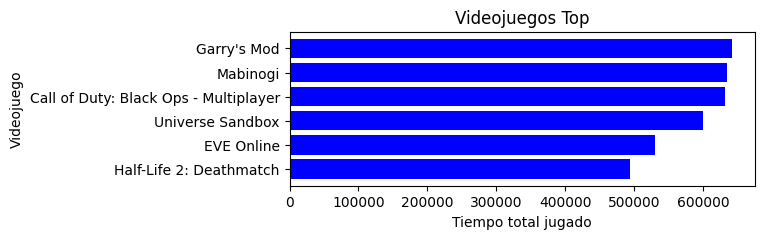

In [96]:
# MOSTRAMOS JUEGOS CON MAS HORAS DE JUEGO 

import matplotlib.pyplot as plt
#Los juegos con mayor tiempo jugado
top_playtime = df_items.sort_values(by='playtime_forever', ascending=False).head(10)

plt.figure(figsize=(6, 2))  

plt.barh(top_playtime['item_name'], top_playtime['playtime_forever'], color='blue')
plt.xlabel('Tiempo total jugado')  
plt.ylabel('Videojuego')         
plt.title('Videojuegos Top') 

plt.gca().invert_yaxis()  

plt.show()

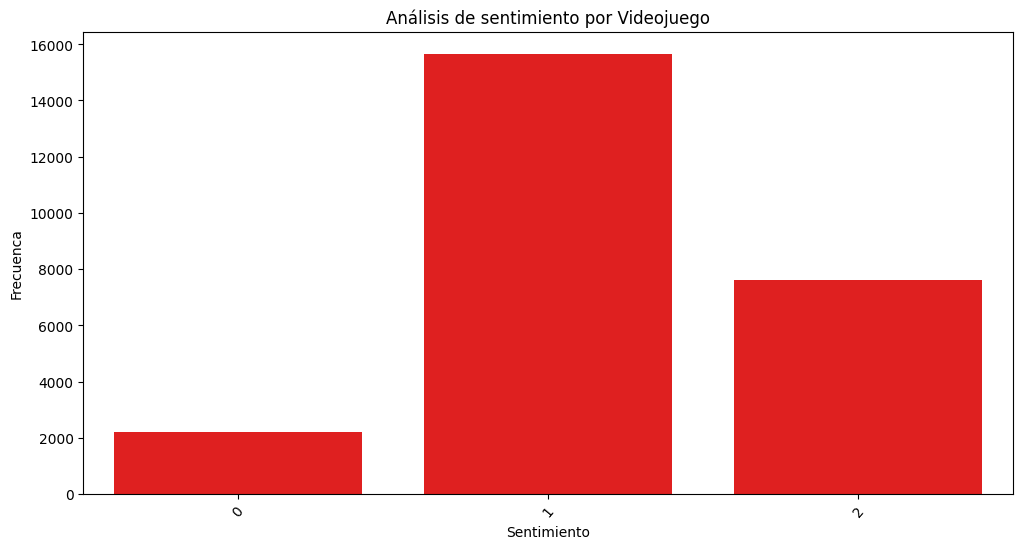

In [97]:
# Analizamos la distribución del análisis de sentimiento

import seaborn as sns
Analisis_sentimiento = df_reviews['sentiment_analysis'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=Analisis_sentimiento.index, y=Analisis_sentimiento.values, color='red')
plt.xticks(rotation=50)

plt.xlabel('Sentimiento')
plt.ylabel('Frecuenca')
plt.title('Análisis de sentimiento por Videojuego')

plt.show()

In [98]:
# CREAMOS OTRO DATAFRAME CON EL MAPEO 
df_datagames = pd.DataFrame(df_steam)
df_datagames.to_csv('PI MLOps - STEAM/DATOS PROCESADOS/df_datagames.csv')